# Stock Market Prediction using Numerical and Textual Analysis

## Importing Libraries

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
dataset = pd.read_csv('BSESN.csv',index_col="Date",parse_dates=True)

In [11]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-04,26704.019531,26800.060547,26510.310547,26552.919922,26552.919922,8000.0
2015-11-05,26557.800781,26557.800781,26243.199219,26304.199219,26304.199219,12300.0
2015-11-06,26284.009766,26438.859375,26190.179688,26265.240234,26265.240234,15600.0
2015-11-09,25809.000000,26193.169922,25656.900391,26121.400391,26121.400391,13300.0
2015-11-10,26094.089844,26094.089844,25709.230469,25743.259766,25743.259766,12800.0


In [13]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-28,40664.351563,40664.351563,39774.601563,39922.460938,39922.460938,29400.0
2020-10-29,39537.171875,40010.828125,39524.250000,39749.851563,39749.851563,19500.0
2020-10-30,39779.820313,39988.250000,39241.871094,39614.070313,39614.070313,12000.0
2020-11-02,39880.378906,39968.031250,39334.921875,39757.578125,39757.578125,15400.0
2020-11-03,39990.750000,40354.730469,39952.789063,40261.128906,40261.128906,21400.0


In [14]:
dataset.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [15]:
dataset.shape

(1232, 6)

In [16]:
# Drop null values
dataset.dropna(inplace=True)

In [17]:
dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
dataset.shape

(1228, 6)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1228 entries, 2015-11-04 to 2020-11-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1228 non-null   float64
 1   High       1228 non-null   float64
 2   Low        1228 non-null   float64
 3   Close      1228 non-null   float64
 4   Adj Close  1228 non-null   float64
 5   Volume     1228 non-null   float64
dtypes: float64(6)
memory usage: 67.2 KB


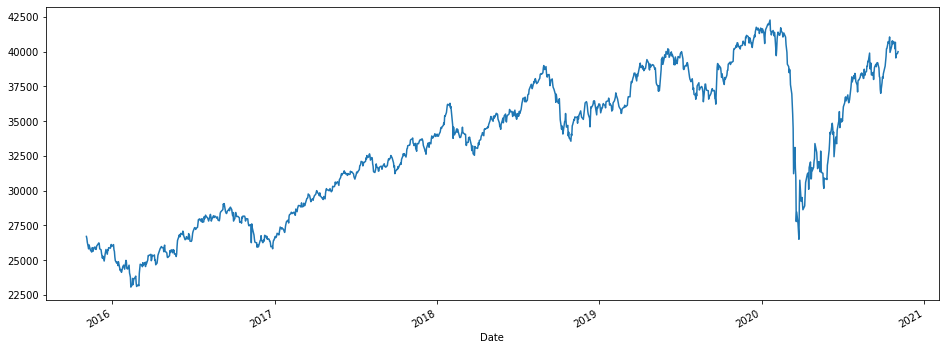

In [20]:
dataset['Open'].plot(figsize=(16,6))

In [21]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-05,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-06,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-09,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-10,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-13,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-16,26107.594308,26239.212891,25900.281529,26051.092634,26051.092634,12114.285714
2015-11-17,25992.431641,26117.518415,25789.207032,25952.742746,25952.742746,12500.000000
2015-11-18,25889.561663,26022.169643,25676.367188,25835.359933,25835.359933,13042.857143


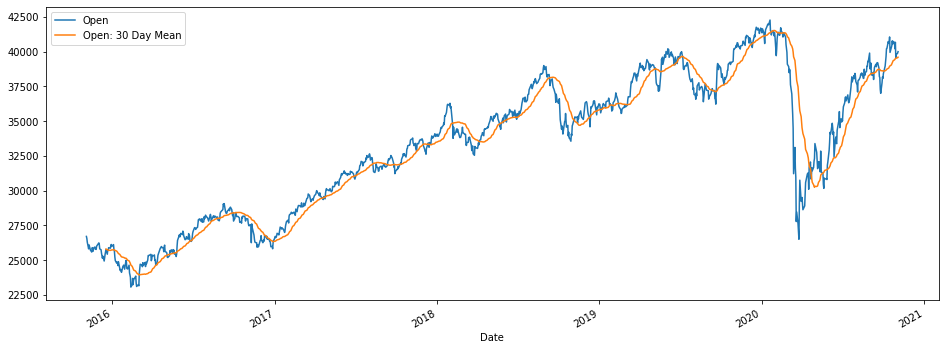

In [22]:
dataset['Open: 30 Day Mean'] = dataset['Open'].rolling(window=30).mean()
dataset[['Open','Open: 30 Day Mean']].plot(figsize=(16,6))

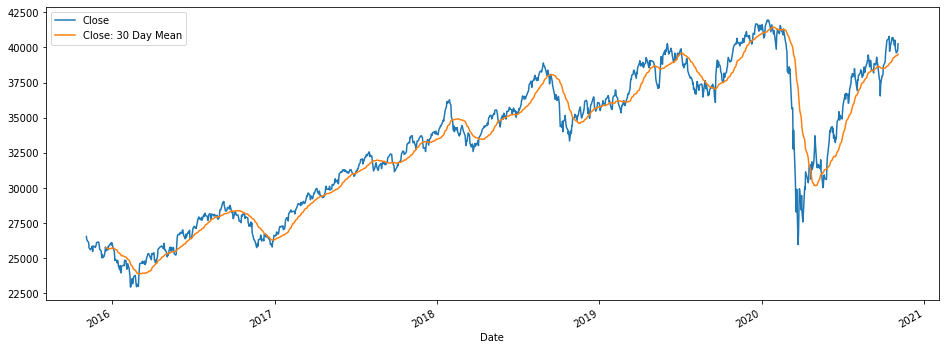

In [23]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [24]:
df1=dataset.reset_index()['Close']

In [25]:
df1.head()

0    26552.919922
1    26304.199219
2    26265.240234
3    26121.400391
4    25743.259766
Name: Close, dtype: float64

In [26]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
print(df1)

[[0.18952308]
 [0.17643306]
 [0.17438268]
 ...
 [0.87692314]
 [0.88447587]
 [0.91097743]]


## Splitting data set

In [28]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(798, 430)

In [30]:
train_data

array([[0.18952308],
       [0.17643306],
       [0.17438268],
       [0.16681248],
       [0.14691118],
       [0.13992565],
       [0.14779745],
       [0.15329043],
       [0.13318858],
       [0.1521036 ],
       [0.15350198],
       [0.15091522],
       [0.1486206 ],
       [0.15824602],
       [0.16717029],
       [0.16808977],
       [0.1693392 ],
       [0.1666256 ],
       [0.15445609],
       [0.14137718],
       [0.13569321],
       [0.12412636],
       [0.10969121],
       [0.12107334],
       [0.11013219],
       [0.11570669],
       [0.12465841],
       [0.13381222],
       [0.15009628],
       [0.13512014],
       [0.14652386],
       [0.13887944],
       [0.15254468],
       [0.15193471],
       [0.16221954],
       [0.16460626],
       [0.15831962],
       [0.16660926],
       [0.14060038],
       [0.1383368 ],
       [0.12917878],
       [0.0999958 ],
       [0.10433772],
       [0.0985858 ],
       [0.09105929],
       [0.10011575],
       [0.09584548],
       [0.079

## Function to create X_train, y_train AND X_test, y_test

In [31]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape), print(y_train.shape)

(697, 100)
(697,)


(None, None)

In [34]:
print(X_test.shape), print(y_test.shape)

(329, 100)
(329,)


(None, None)

In [35]:
# reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
print(X_train.shape), print(y_train.shape)

(697, 100, 1)
(697,)


(None, None)

## Creating LSTM Model

In [37]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [38]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
history_LSTM=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 2s 171ms/step - loss: 0.0721 - val_loss: 0.0255
Epoch 2/100
11/11 [==============================] - 1s 77ms/step - loss: 0.0108 - val_loss: 0.0142
Epoch 3/100
11/11 [==============================] - 1s 77ms/step - loss: 0.0058 - val_loss: 0.0280
Epoch 4/100
11/11 [==============================] - 1s 78ms/step - loss: 0.0031 - val_loss: 0.0119
Epoch 5/100
11/11 [==============================] - 1s 77ms/step - loss: 0.0018 - val_loss: 0.0117
Epoch 6/100
11/11 [==============================] - 1s 76ms/step - loss: 0.0014 - val_loss: 0.0120
Epoch 7/100
11/11 [==============================] - 1s 76ms/step - loss: 0.0014 - val_loss: 0.0115
Epoch 8/100
11/11 [==============================] - 1s 79ms/step - loss: 0.0014 - val_loss: 0.0113
Epoch 9/100
11/11 [==============================] - 1s 78ms/step - loss: 0.0014 - val_loss: 0.0112
Epoch 10/100
11/11 [==============================] - 1s 75ms/step - loss: 0.0013 - val_loss: 0.011

### Plotting loss

In [41]:
def plot_learningCurve(history,epochs):
    
    ## Plot training and validation loss value
    epoch_range= range(1,epochs+1)
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel("Epochs")
    plt.ylabel('loss')
    plt.legend(['Train', 'val'],loc='upper_left')
    plt.show()
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


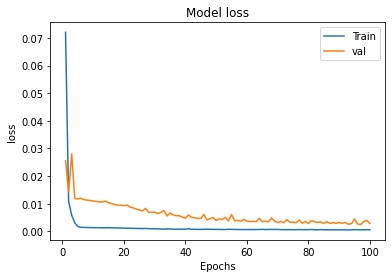

In [42]:
plot_learningCurve(history_LSTM,100)

# Prediction

In [43]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [44]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

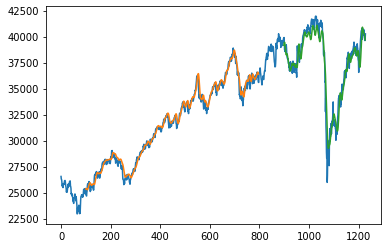

In [45]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Model Definition with Conv1D

In [46]:
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten

In [47]:
# define model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')

In [48]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 99, 64)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 49, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                156850    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 157,093
Trainable params: 157,093
Non-trainable params: 0
_________________________________________________________________


In [49]:
history_CNN=model_cnn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0556 - val_loss: 0.0599
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0644
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.0358
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0325
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 0.0281
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0256
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0210
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0187
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0167
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0144
Epoch 11

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


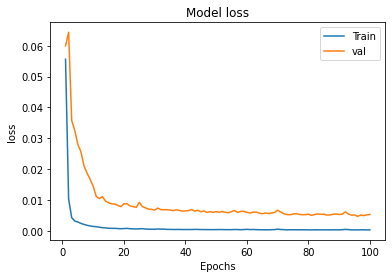

In [50]:
plot_learningCurve(history_CNN,100)

# Prediction

In [51]:
train_predict_cnn=model_cnn.predict(X_train)
test_predict_cnn=model_cnn.predict(X_test)

In [52]:
##Transformback to original form
train_predict_cnn=scaler.inverse_transform(train_predict_cnn)
test_predict_cnn=scaler.inverse_transform(test_predict_cnn)

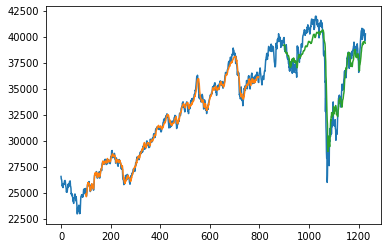

In [53]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_cnn)+look_back, :] = train_predict_cnn
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict_cnn)+(look_back*2)+1:len(df1)-1, :] = test_predict_cnn
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Model Definition with Conv1D and LSTM

In [54]:
# define model
model_mix = Sequential()
model_mix.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100, 1)))
model_mix.add(MaxPooling1D(pool_size=2))
model_mix.add(LSTM(32,return_sequences=True))
model_mix.add(LSTM(32))
model_mix.add(Dense(6, activation='relu'))
model_mix.add(Dense(1))
model_mix.compile(optimizer='adam', loss='mse')

In [55]:
model_mix.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 99, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 49, 32)            12416     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 21,133
Trainable params: 21,133
Non-trainable params: 0
__________________________________________________

In [56]:
history_mix=model_mix.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 1s 97ms/step - loss: 0.1510 - val_loss: 0.0599
Epoch 2/100
11/11 [==============================] - 0s 26ms/step - loss: 0.0189 - val_loss: 0.0604
Epoch 3/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0095 - val_loss: 0.0324
Epoch 4/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0055 - val_loss: 0.0297
Epoch 5/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0032 - val_loss: 0.0205
Epoch 6/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0023 - val_loss: 0.0208
Epoch 7/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0021 - val_loss: 0.0190
Epoch 8/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0021 - val_loss: 0.0187
Epoch 9/100
11/11 [==============================] - 0s 26ms/step - loss: 0.0020 - val_loss: 0.0189
Epoch 10/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0020 - val_loss: 0.0190

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


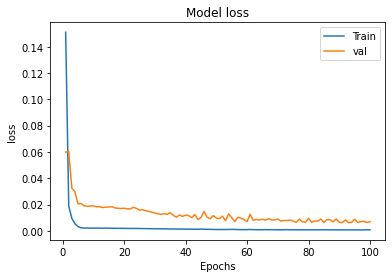

In [57]:
plot_learningCurve(history_mix,100)

# Prediction

In [58]:
train_predict_mix=model_mix.predict(X_train)
test_predict_mix=model_mix.predict(X_test)

In [59]:
##Transformback to original form
train_predict_mix=scaler.inverse_transform(train_predict_mix)
test_predict_mix=scaler.inverse_transform(test_predict_mix)

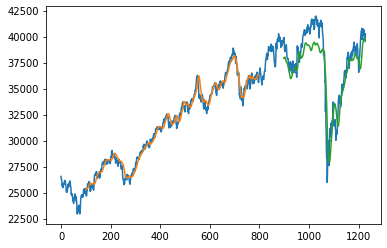

In [60]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_mix)+look_back, :] = train_predict_mix
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict_mix)+(look_back*2)+1:len(df1)-1, :] = test_predict_mix
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Textual Analysis

In [71]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [95]:
cols = ['Date','Category','News']
df_news = pd.read_csv('india-news-headlines.csv', names = cols)
df_news

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
...,...,...,...
3297168,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297169,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297170,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297171,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [96]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 75.5+ MB


In [97]:
df_news.head()

,Date,News
1,20010101,win over cena satisfying but defeating underta...
2,20010102,Status quo will not be disturbed at Ayodhya; s...
3,20010102,Fissures in Hurriyat over Pak visit
4,20010102,America's unwanted heading for India?
5,20010102,For bigwigs; it is destination Goa


In [98]:
#Converting data type of Date column 
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
df_news

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297168,2020-06-30,why tiktok removed 1 65 crore videos in india
3297169,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297170,2020-06-30,kangana ranaut gets a doll version of herself ...
3297171,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [99]:
#Grouping the headlines for each day
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news.head(10)

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
5,2001-01-06,Light combat craft takes India into club class...
6,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...
7,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...
8,2001-01-09,Financier Bharat Shah held for alleged links w...
9,2001-01-10,Fend for yourselves; Pande tells doctors Burea...


In [100]:
df_news.shape

(7080, 2)

In [101]:
df_news.tail()

,Date,News
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...
7079,2020-06-30,Detective Byomkesh Bakshy! Edge of Tomorrow Fi...


In [102]:
#Cleaning headlines
ps= PorterStemmer()
c = []
for i in range(0,len(df_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)

In [103]:
df_news['News'] = pd.Series(c)
df_news

,Date,News
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
2,2001-01-03,powerless north india grope dark think laxman ...
3,2001-01-04,string pull stephen hawk india vajpaye give bi...
4,2001-01-05,light combat craft take india club class hawk ...
...,...,...
7075,2020-06-26,contain zone resid slam high price charg veget...
7076,2020-06-27,like wont let toxic relationship food major ra...
7077,2020-06-28,atanu ghosh plan rewrit old script make relev ...
7078,2020-06-29,hot stylish bikini look katrina kaif anna eden...


In [104]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [105]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404
...,...,...,...,...
7075,2020-06-26,contain zone resid slam high price charg veget...,0.330257,0.066958
7076,2020-06-27,like wont let toxic relationship food major ra...,0.372264,0.064784
7077,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.378165,0.054209
7078,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782


In [106]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000,0.2023,0.234,0.469,0.297
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
...,...,...,...,...,...,...,...,...
7075,2020-06-26,contain zone resid slam high price charg veget...,0.330257,0.066958,-0.9998,0.142,0.789,0.069
7076,2020-06-27,like wont let toxic relationship food major ra...,0.372264,0.064784,-0.9998,0.139,0.790,0.070
7077,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.378165,0.054209,-0.9998,0.136,0.800,0.064
7078,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782,-0.9998,0.130,0.800,0.070


In [107]:
df_merge = pd.merge(dataset, df_news, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,Open: 30 Day Mean,Close: 30 Day Mean,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2015-11-04,26704.019531,26800.060547,26510.310547,26552.919922,26552.919922,8000.0,NaN,NaN,rule date non vegetarian top diabet diet tip i...,0.407544,0.081833,-0.9996,0.129,0.780,0.091
1,2015-11-05,26557.800781,26557.800781,26243.199219,26304.199219,26304.199219,12300.0,NaN,NaN,easi gajar ka halwa recip five festiv hair ide...,0.373590,0.115210,-0.9983,0.117,0.783,0.099
2,2015-11-06,26284.009766,26438.859375,26190.179688,26265.240234,26265.240234,15600.0,NaN,NaN,way make life romant brilliant way prevent obe...,0.423474,0.078966,-0.9981,0.125,0.767,0.109
3,2015-11-09,25809.000000,26193.169922,25656.900391,26121.400391,26121.400391,13300.0,NaN,NaN,perfum safe health think love secretari women ...,0.529966,0.305813,-0.9920,0.120,0.767,0.113
4,2015-11-10,26094.089844,26094.089844,25709.230469,25743.259766,25743.259766,12800.0,NaN,NaN,top workout mistak book review enigma china fi...,0.466888,0.183373,0.9799,0.108,0.781,0.111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,32927.625651,32920.341797,never thought voic today vidya rajput never th...,0.368654,0.077799,-0.9997,0.126,0.807,0.067
1135,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,32983.742969,33014.791537,truck firm look new export market sell bs rang...,0.362784,0.011935,-0.9999,0.153,0.795,0.052
1136,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,33106.358008,33149.737500,contain zone resid slam high price charg veget...,0.330257,0.066958,-0.9998,0.142,0.789,0.069
1137,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,33227.380339,33278.530469,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782,-0.9998,0.130,0.800,0.070


In [108]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,26552.919922,0.407544,0.081833,-0.9996,0.129,0.780,0.091
1,26304.199219,0.373590,0.115210,-0.9983,0.117,0.783,0.099
2,26265.240234,0.423474,0.078966,-0.9981,0.125,0.767,0.109
3,26121.400391,0.529966,0.305813,-0.9920,0.120,0.767,0.113
4,25743.259766,0.466888,0.183373,0.9799,0.108,0.781,0.111
...,...,...,...,...,...,...,...
1134,34868.980469,0.368654,0.077799,-0.9997,0.126,0.807,0.067
1135,34842.101563,0.362784,0.011935,-0.9999,0.153,0.795,0.052
1136,35171.269531,0.330257,0.066958,-0.9998,0.142,0.789,0.069
1137,34961.519531,0.373210,0.060782,-0.9998,0.130,0.800,0.070


In [109]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.189523,0.406944,0.298177,0.000201,0.421569,0.427350,0.5375
1,0.176433,0.256960,0.402763,0.000853,0.303922,0.452991,0.6375
2,0.174383,0.477316,0.289194,0.000953,0.382353,0.316239,0.7625
3,0.166812,0.947722,1.000000,0.004013,0.333333,0.316239,0.8125
4,0.146911,0.669085,0.616345,0.993277,0.215686,0.435897,0.7875


In [110]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [111]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.406944,0.298177,0.000201,0.421569,0.427350,0.5375
1,0.256960,0.402763,0.000853,0.303922,0.452991,0.6375
2,0.477316,0.289194,0.000953,0.382353,0.316239,0.7625
3,0.947722,1.000000,0.004013,0.333333,0.316239,0.8125
4,0.669085,0.616345,0.993277,0.215686,0.435897,0.7875


In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(911, 6)

In [113]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
644,0.293345,0.183696,0.000050,0.558824,0.521368,0.2125
597,0.504759,0.374958,0.000050,0.754902,0.213675,0.4250
317,0.297984,0.385561,0.000151,0.421569,0.461538,0.4875
859,0.402968,0.393943,0.000151,0.450980,0.461538,0.4375
632,0.139565,0.148648,0.000050,0.637255,0.376068,0.3500
1000,0.193229,0.296395,0.000050,0.637255,0.384615,0.3250
895,0.309974,0.219940,0.000050,0.705882,0.273504,0.4000
311,0.295420,0.289444,0.000151,0.392157,0.470085,0.5125
604,0.253471,0.241185,0.000050,0.803922,0.256410,0.3000
501,0.183190,0.266279,0.000050,0.637255,0.299145,0.4500


**RANDOM FOREST REGESSOR**

In [119]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [120]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.70121626 0.68639466 0.66794208 0.57380038 0.47172991 0.66068736
 0.53808495 0.76004726 0.53452284 0.58383488]
671     0.730141
877     0.911319
971     0.847701
184     0.269805
1138    0.629656
935     0.773096
567     0.571959
890     0.854841
1082    0.374478
569     0.604918
Name: Close, dtype: float64
0.047473019079075134


**DECISION TREEE REGRESSOR**

In [121]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [122]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.82480054 0.95737186 0.84406494 0.7163935  0.57917888 0.25704604
 0.71284061 0.9573293  0.95671461 0.87248377]
671     0.730141
877     0.911319
971     0.847701
184     0.269805
1138    0.629656
935     0.773096
567     0.571959
890     0.854841
1082    0.374478
569     0.604918
Name: Close, dtype: float64
0.09550304682922404


**XG BOOST REGRESSOR**

In [123]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

[17:59:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [124]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.05076727690118354
